# <center>Importing Libraries</center>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.colors as mcolors
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

### <center>Importing CSV</center>

In [2]:
data = pd.read_csv('dataset_sdn.csv')

# <center>Gaining Information about the Dataset</center>

In [3]:
data.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,4.716150e+06,212.210676,0.600987,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,7.560116e+06,246.855123,0.489698,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,5.521680e+05,276.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,9.728112e+06,333.000000,1.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


In [4]:
data.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [5]:
v1 = data.shape
print("The number of fields in the dataset =",v1[1])
print("The number of records in the dataset =", v1[0])

The number of fields in the dataset = 23
The number of records in the dataset = 104345


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [7]:
numeric_df = data.select_dtypes(include=['int64', 'float64'])
object_df = data.select_dtypes(include=['object'])
numeric_cols = numeric_df.columns
object_cols = object_df.columns
print('Numeric Columns: ',numeric_cols)
print('Object Columns: ', object_cols)
print('Number of Numeric Features: ', len(numeric_cols))
print('Number of Object Features: ', len(object_cols))



Numeric Columns:  Index(['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps',
       'tot_kbps', 'label'],
      dtype='object')
Object Columns:  Index(['src', 'dst', 'Protocol'], dtype='object')
Number of Numeric Features:  20
Number of Object Features:  3


#### <center>Trying to convert categorical data to numerical using direct conversion</center>

In [8]:
#replacing the values of categorical columns with numerical values:
Categorical_columns = {}
for i in data.columns:
    if data[i].dtypes == "object":
        x = data[i].unique()
        Categorical_columns[i] = x
k = Categorical_columns.keys()
v = Categorical_columns.values()

for i,j in zip(k,v) :
    dict = {}
    for x in range(len(j)):
        dict[j[x]] = x
    #print(dict)
    for y in data.index:
        m = data[i][y]
        data[i][y] = dict[m]
# saving the data to a csv file
data.to_csv("Dataset.csv",index=False)

In [9]:
#checking and removing null values:
print(data.isnull().sum())
data = data.dropna()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64


# <center>Working with the labels</center>

In [10]:
v1 = data.label.value_counts()
print("The number of Legit requests =",v1[0])
print("The number of Malicious requests =",v1[1])

The number of Legit requests = 63335
The number of Malicious requests = 40504


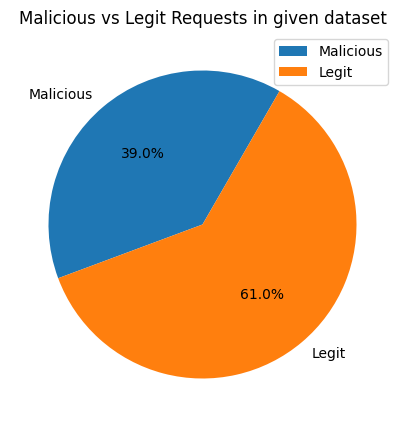

In [11]:
#plotting pie chart for malicious vs legit requests:
labels = ['Malicious','Legit']
legit = data['label'].value_counts()[0]
malicious = data['label'].value_counts()[1]
# label_dict = dict(df['label'].value_counts())
# print(label_dict)
sizes = [malicious,legit]
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',startangle=60)
plt.legend(['Malicious', 'Legit'])
plt.title('Malicious vs Legit Requests in given dataset')
plt.show()

# <center>Data Pre-processing</center>

In [12]:
df_old = data.copy()
# df_old = df_old.drop(['src', 'dst','Protocol'], axis=1)

df1 = data.copy()
df1 = df1.dropna()

v1 = df1.shape
print("The number of fields in the dataset =",v1[1])
print("The number of records in the dataset =", v1[0])
print("Whereas originally it was = 104345")

The number of fields in the dataset = 23
The number of records in the dataset = 103839
Whereas originally it was = 104345


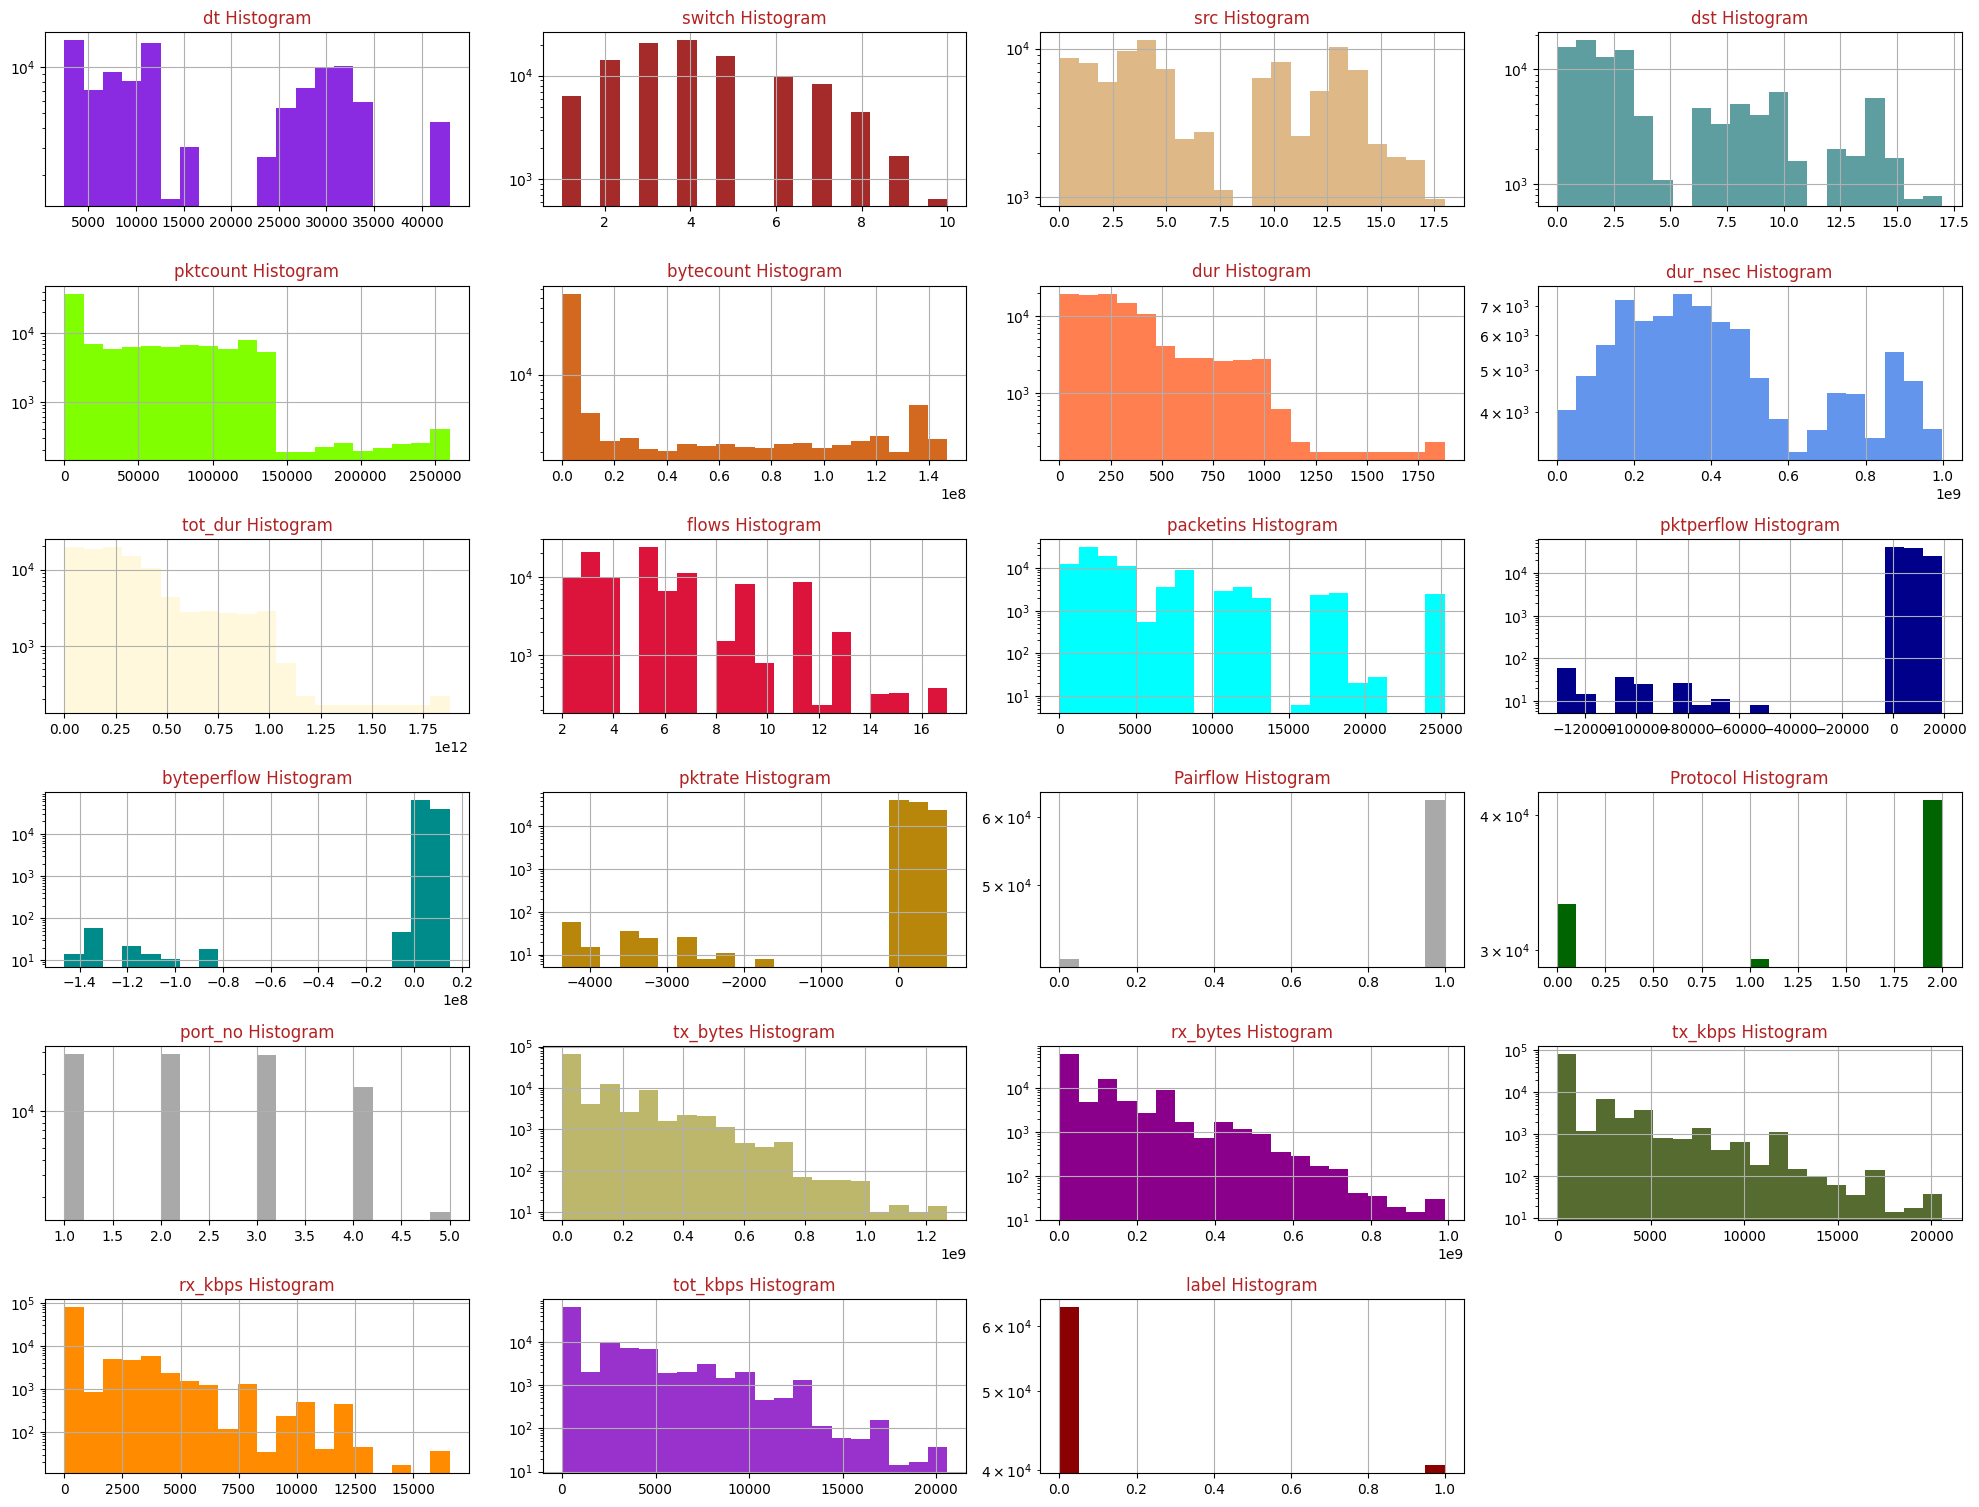

In [13]:
#exploratory data visualization:
colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram",color=colors[35])
        ax.set_yscale('log')
    fig.tight_layout() 
    plt.show()
draw_histograms(df_old,df_old.columns,8,4)

<AxesSubplot: >

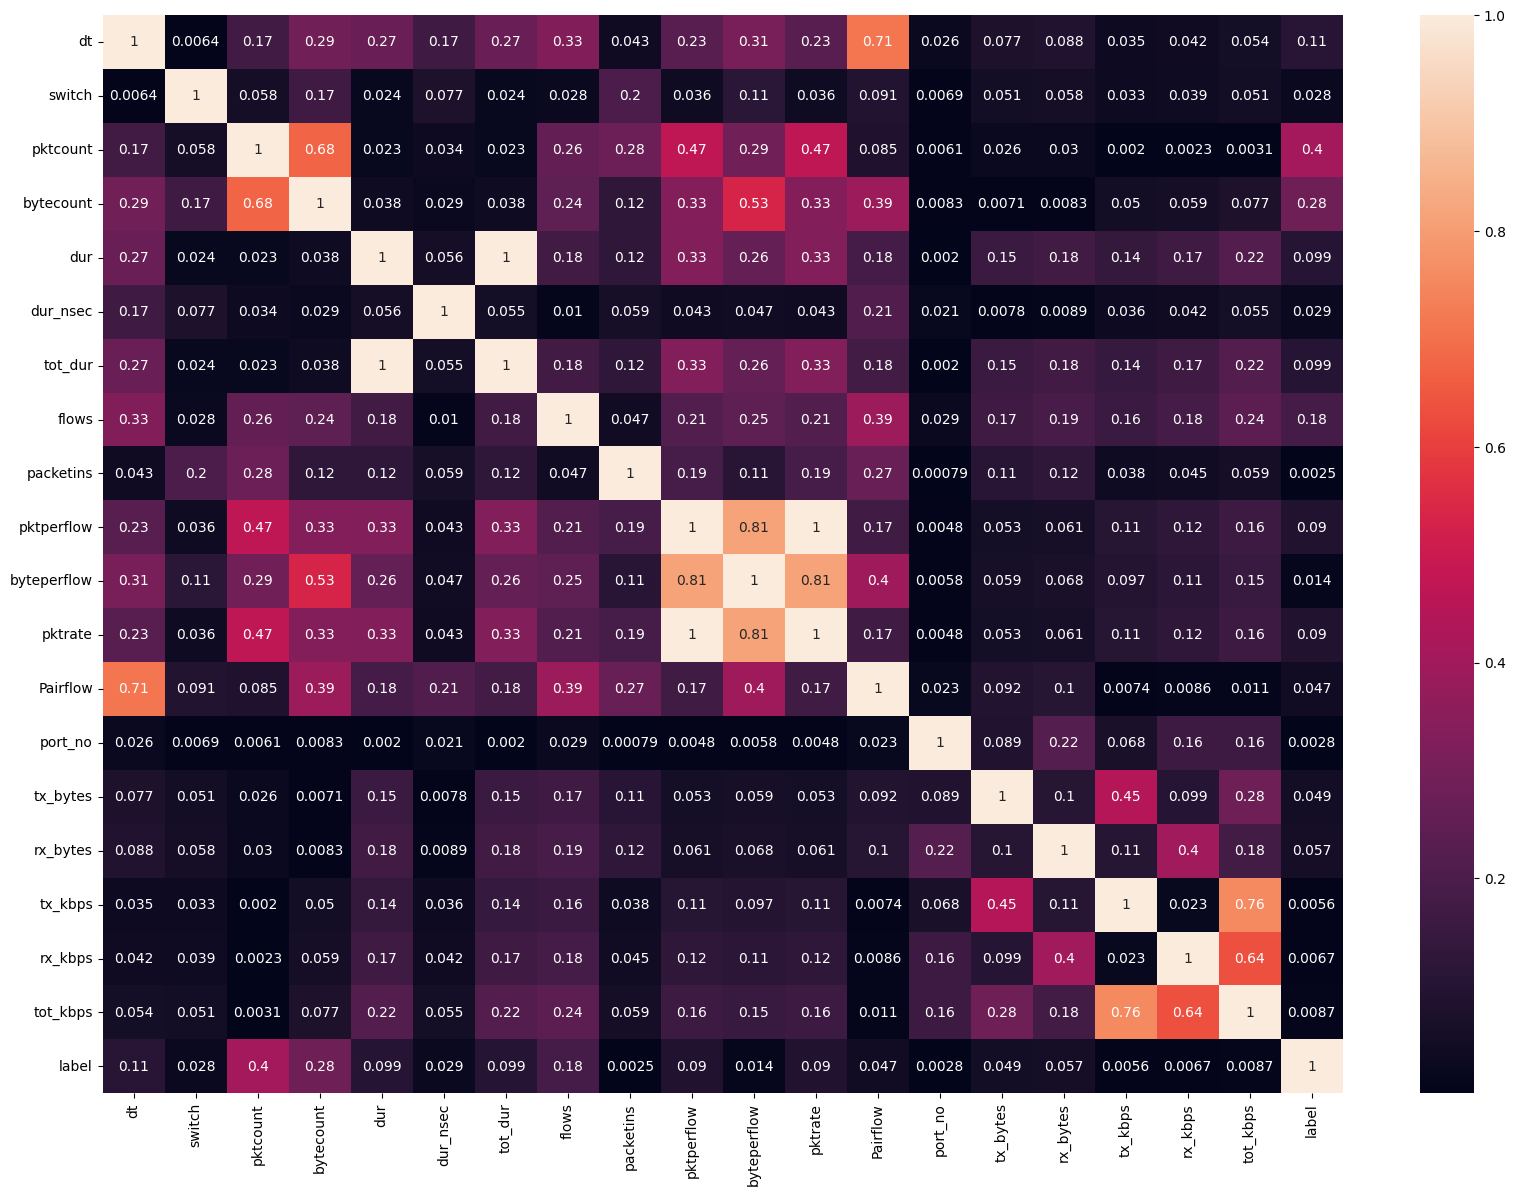

In [14]:
abs(df1.corr())
fig, ax = plt.subplots(figsize=(20,14)) 
sns.heatmap(abs(df1.corr()), annot=True)

<center>Using the information given in the reference<br>we can remove some of the columns having lower weights</center>

In [15]:
important_features = [ 'src', 'pktcount', 'dst', 'byteperflow', 'pktperflow', 'pktrate', 'tot_kbps', 'rx_kbps', 'flows', 
'bytecount', 'dt', 'Protocol', 'dur', 'tot_dur']


weights = [ 17.87, 15.16, 13.64, 12.97, 11.35, 11.35, 9.68, 9.66, 8.95, 4.92, 2.33, 1.31, 1.11, 1.11]

In [16]:
weighted_features = pd.DataFrame({'features':important_features, 'weights':weights})
weighted_features

,features,weights
0,src,17.87
1,pktcount,15.16
2,dst,13.64
3,byteperflow,12.97
4,pktperflow,11.35
5,pktrate,11.35
6,tot_kbps,9.68
7,rx_kbps,9.66
8,flows,8.95
9,bytecount,4.92


In [17]:
### But we dont need src, dst, So, we will drop them
df_new = df1[important_features]
y = df1.label

df_new.head()

,src,pktcount,dst,byteperflow,pktperflow,pktrate,tot_kbps,rx_kbps,flows,bytecount,dt,Protocol,dur,tot_dur
0,0,45304,0,14428310,13535,451,0.0,0.0,3,48294064,11425,0,100,1.010000e+11
1,0,126395,0,14424046,13531,451,0.0,0.0,2,134737070,11605,0,280,2.810000e+11
2,1,90333,0,14427244,13534,451,0.0,0.0,3,96294978,11425,0,200,2.010000e+11
3,1,90333,0,14427244,13534,451,0.0,0.0,3,96294978,11425,0,200,2.010000e+11
4,1,90333,0,14427244,13534,451,0.0,0.0,3,96294978,11425,0,200,2.010000e+11


<AxesSubplot: >

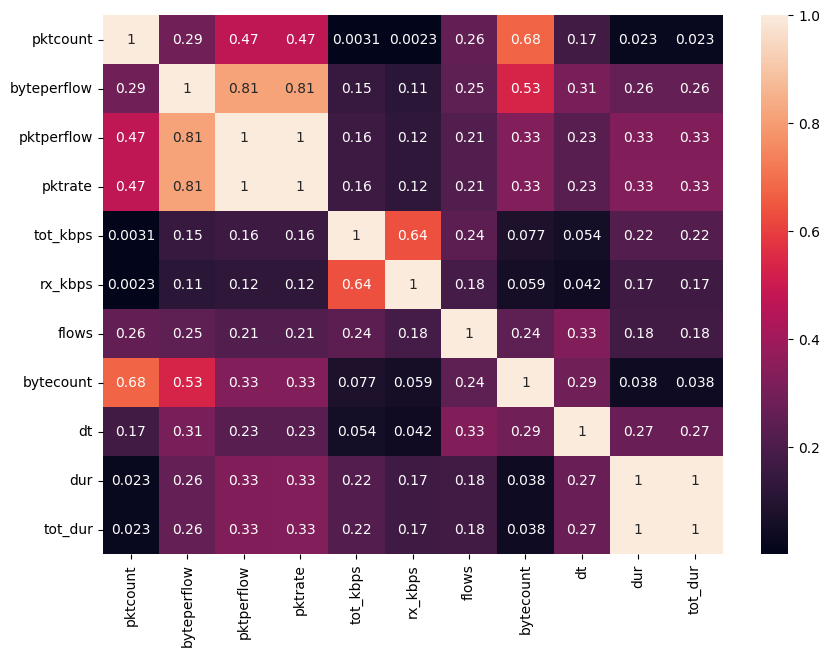

In [18]:
abs(df_new.corr())
fig, ax = plt.subplots(figsize=(10,7)) 
sns.heatmap(abs(df_new.corr()), annot=True)

<center>
We can see that duration and total duration are highly correlated<br>
Similarly "pktrate" and "pktperflow" are also highly correlated<br>
Therefore, they can be removed
</center> 

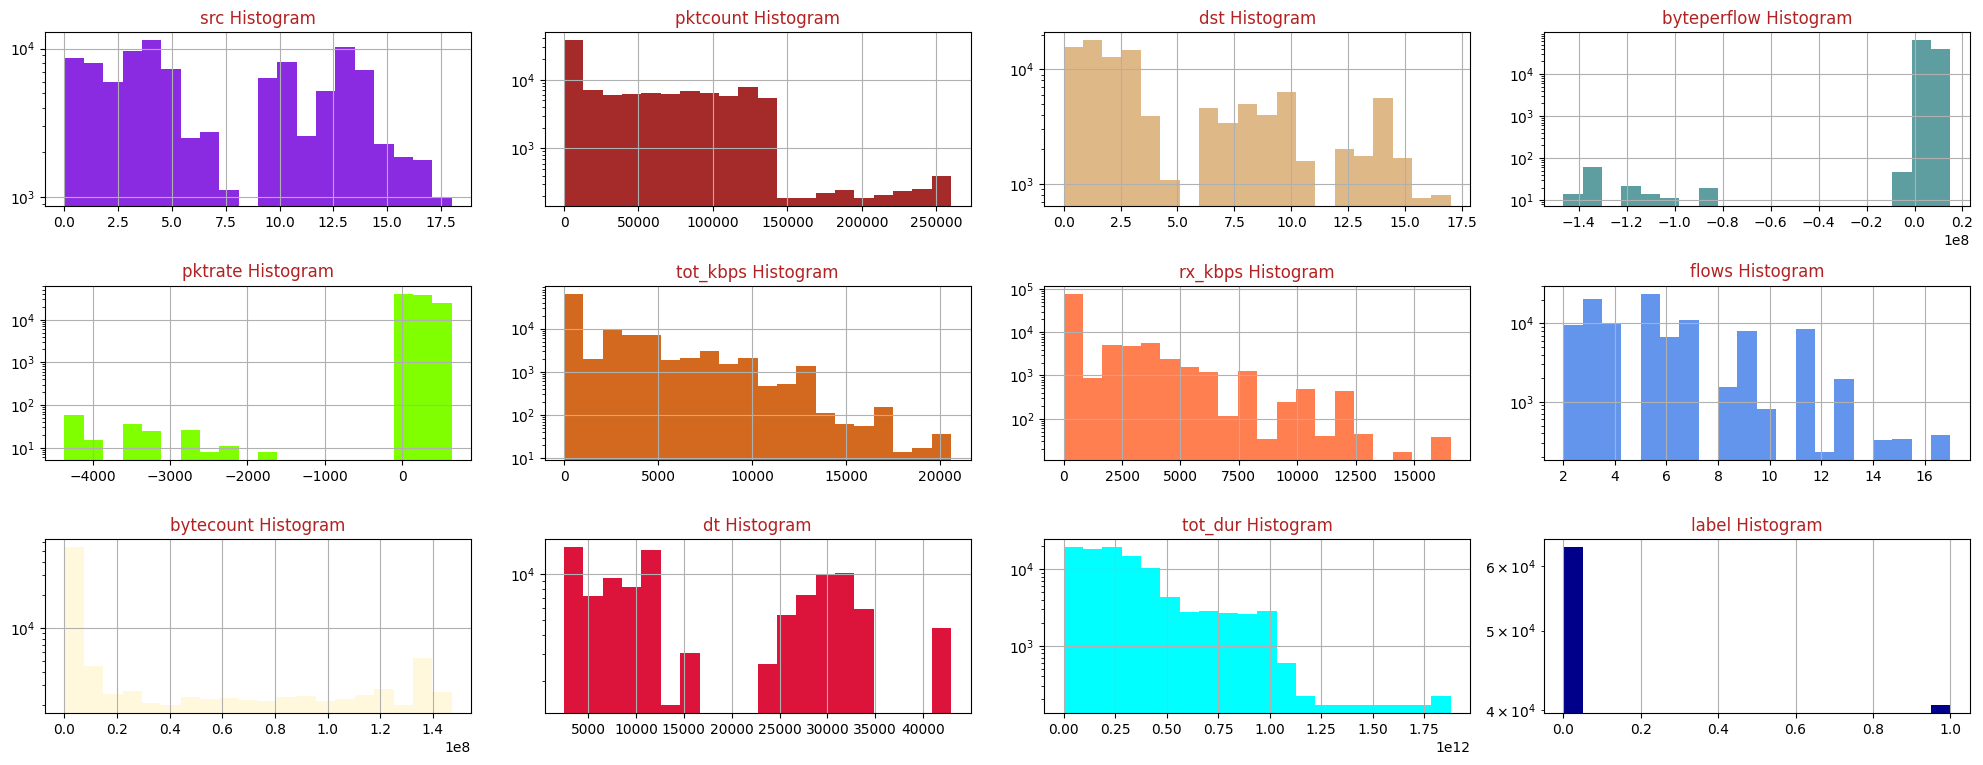

In [19]:
df_new = df_new.drop(['dur', "pktperflow","Protocol"], axis=1)
df_new["label"] = y

#exploratory data visualization:
colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram",color=colors[35])
        ax.set_yscale('log')
    fig.tight_layout() 
    plt.show()
draw_histograms(df_new,df_new.columns,8,4)

#### <center>This df_new is our processed dataset</center>

# <center>Applying Models</center>

In [20]:
#creating a dictionary to store accuracy values:
Model_acc = {}
Model_acc_o = {}

#defining ML model:

def RandomForest(X_train,X_test,y_train,y_test):
        #to calculate run time 
        start_time = time.time()
        #training the model:
        RF = RandomForestClassifier(criterion='gini',n_estimators=300,min_samples_split=20,min_samples_leaf=3,max_features='auto',oob_score=True,random_state=1,n_jobs=-1)
        RFmodel= RF.fit(X_train,y_train)
        #predicted values of RF
        y_predict = RFmodel.predict(X_test)
        #creating confusion matrix and finding acc score
        conf_m = confusion_matrix(y_test, y_predict)
        rf_acc = accuracy_score(y_test, y_predict)
        print()
        print('Prediction using RandomForest Model.')
        print('-------------------------------------------------------------------')
        print("Acc of Random Forest is:-", rf_acc*100,".")
        print("Time taken to run the model is:-", (time.time() - start_time),"seconds.")
        # creating heat map for representig the confusion matrix
        cm=confusion_matrix(y_test,y_predict)
        plt.figure(figsize=(7,7))
        plt.title("Confusion Matrix")
        sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
        plt.ylabel("Actual Values")
        plt.xlabel("Predicted Values")
        Model_acc_o['RandomForest'] = rf_acc*100
        Model_acc['RandomForest'] = rf_acc*100
        
def KNN(X_train,X_test,y_train,y_test):
        # Defining K values and creating list to store accuracy values
        k=[1,3,5]
        Accuracy=[]
        # perfoming knn method for prediction
        for i in k:
            start_time = time.time()
            neigh = KNeighborsClassifier(n_neighbors=i)
            #training the classfier
            neigh.fit(X_train, y_train)
            #predicting class of test data
            y_predict =neigh.predict(X_test)
            #creating confusion matrix and finding acc score
            conf_m = confusion_matrix(y_test, y_predict)
            knn_acc = accuracy_score(y_test, y_predict)
            print()
            print('Prediction using KNN Model.')
            print('-------------------------------------------------------------------')
            print("Acc of KNN model with k=",i,"is:-", knn_acc*100,".")
            print("Time taken to run the model is:-", (time.time() - start_time),"seconds.")
            # creating heat map for representig the confusion matrix
            cm=confusion_matrix(y_test,y_predict)
            plt.figure(figsize=(7,7))
            plt.title("Confusion Matrix")
            sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
            plt.ylabel("Actual Values")
            plt.xlabel("Predicted Values")
            Accuracy.append(knn_acc)
        knn_acc = max(Accuracy)
        Model_acc_o['KNN'] = knn_acc*100
        Model_acc['KNN'] = knn_acc*100

def SupportVectorMachine(X_train,X_test,y_train,y_test):
        start_time = time.time()
        accuracy_list = []
        result_svm = []
        kernels = ['linear', 'poly','rbf']
        for kernel in kernels:
            SVM = svm.SVC(kernel=kernel).fit(X_train,y_train)
            predicted_svm = SVM.predict(X_test)
            accuracy_svm = accuracy_score(y_test, predicted_svm)
            result_svm.append({"kernel" : kernel, "accuracy": f"{round(accuracy_svm*100,2)}%"})
            print("Accuracy with kernel as",kernel,"is : %.2f%%" % round((accuracy_svm * 100.0),2))
            accuracy_list.append(accuracy_svm)
        kernel_name = kernels[accuracy_list.index(max(accuracy_list))]
        SVM = svm.SVC(kernel=kernel_name).fit(X_train, y_train)
        y_predict = SVM.predict(X_test)
        #creating confusion matrix and finding acc score
        conf_m = confusion_matrix(y_test, y_predict)
        svm_acc = accuracy_score(y_test, y_predict)
        print()
        print('Prediction using SVM Model.')
        print('-------------------------------------------------------------------')
        print("Acc of SVM model is", svm_acc*100,".")
        print("Time taken to run the model is:-", (time.time() - start_time),"seconds.")
        # creating heat map for representig the confusion matrix
        cm=confusion_matrix(y_test,y_predict)
        plt.figure(figsize=(7,7))
        plt.title("Confusion Matrix")
        sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
        plt.ylabel("Actual Values")
        plt.xlabel("Predicted Values")
        Model_acc_o['SVM'] = svm_acc*100
        Model_acc['SVM'] = svm_acc*100
        print('best kernel is : ', kernel_name)
        print(classification_report(predicted_svm, y_test))

def LogisticRegress(X_train,X_test,y_train,y_test):
        start_time = time.time()
        LR = LogisticRegression(C=0.06,solver='liblinear',random_state= 42)
        LR.fit(X_train,y_train)
        y_predict = LR.predict(X_test)
        accuracy_lr = accuracy_score(y_test,y_predict)
        #creating confusion matrix and finding acc score
        conf_m = confusion_matrix(y_test, y_predict)
        lr_acc = accuracy_score(y_test, y_predict)
        print()
        print('Prediction using Logistic Regression Model.')
        print('-------------------------------------------------------------------')
        print("Acc of Logistic Regression is:-", lr_acc*100,".")
        print("Time taken to run the model is:-", (time.time() - start_time),"seconds.")
        # creating heat map for representig the confusion matrix
        cm=confusion_matrix(y_test,y_predict)
        plt.figure(figsize=(7,7))
        plt.title("Confusion Matrix")
        sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
        plt.ylabel("Actual Values")
        plt.xlabel("Predicted Values")
        Model_acc_o['LogisticRegression'] = lr_acc*100
        Model_acc['LogisticRegression'] = lr_acc*100

# <center>Creating training and testing for database without pre-processing</center>

In [21]:
# df = pd.read_csv("Dataset.csv")
# data1 = df.drop('label',axis='columns')
# x = preprocessing.StandardScaler().fit(data1).transform(data1)
# y = df.label
#separating data as per classes
df_0_o=df_old[df_old["label"]==0]
df_1_o=df_old[df_old["label"]==1]
df_label0_o=df_0_o.label
df_label1_o=df_1_o.label
del df_1_o['label']
del df_0_o['label']

# splitting data for training and testing purpose
[X0_train_o, X0_test_o, y0_train_o, y0_test_o]=train_test_split(df_0_o,df_label0_o, test_size=0.3, random_state=42,shuffle=True)
[X1_train_o, X1_test_o, y1_train_o, y1_test_o]=train_test_split(df_1_o,df_label1_o, test_size=0.3, random_state=42,shuffle=True)

# aggregating the training data and test data ofboth classes
X_train_o = pd.concat((X0_train_o,X1_train_o),axis=0)
y_train_o = pd.concat((y0_train_o,y1_train_o),axis=0)
X_test_o = pd.concat((X0_test_o,X1_test_o),axis=0)
y_test_o = pd.concat((y0_test_o,y1_test_o),axis=0)

#normalizing the data:
X_train_NR_o = preprocessing.StandardScaler().fit(X_train_o).transform(X_train_o)
X_test_NR_o = preprocessing.StandardScaler().fit(X_test_o).transform(X_test_o)

#creating a dictionary to store accuracy values:
Model_acc_o = {}


Prediction using KNN Model.
-------------------------------------------------------------------
Acc of KNN model with k= 1 is:- 97.77549513690495 .
Time taken to run the model is:- 1.7313039302825928 seconds.

Prediction using KNN Model.
-------------------------------------------------------------------
Acc of KNN model with k= 3 is:- 97.72092575353899 .
Time taken to run the model is:- 1.5824816226959229 seconds.

Prediction using KNN Model.
-------------------------------------------------------------------
Acc of KNN model with k= 5 is:- 97.67598626135525 .
Time taken to run the model is:- 1.5791230201721191 seconds.


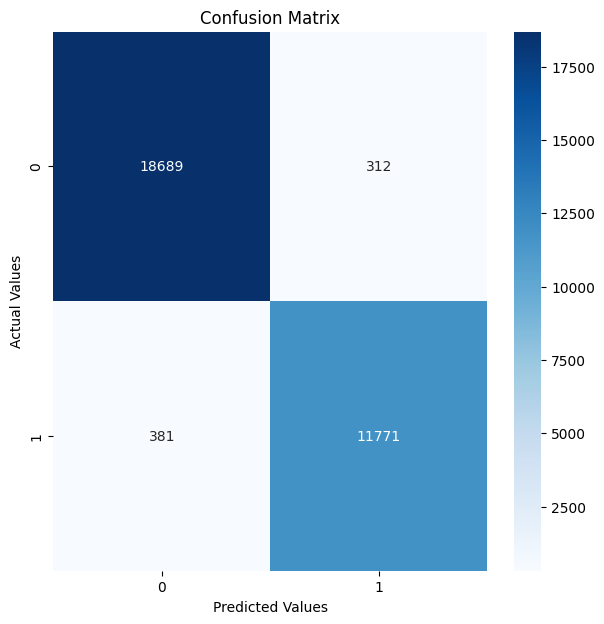

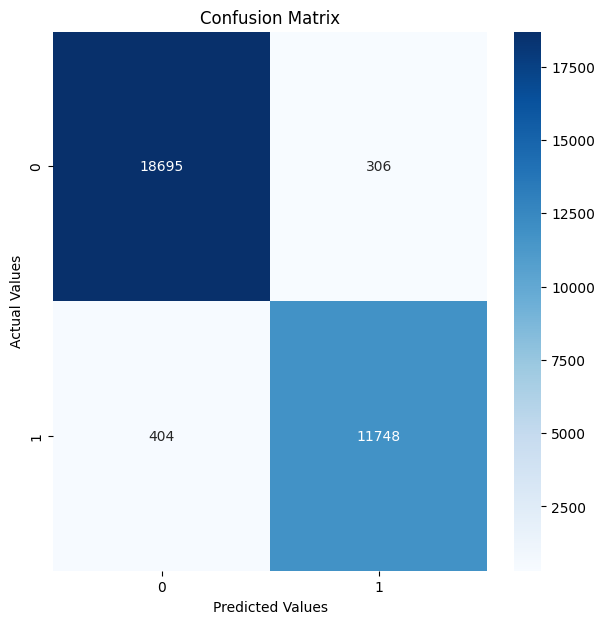

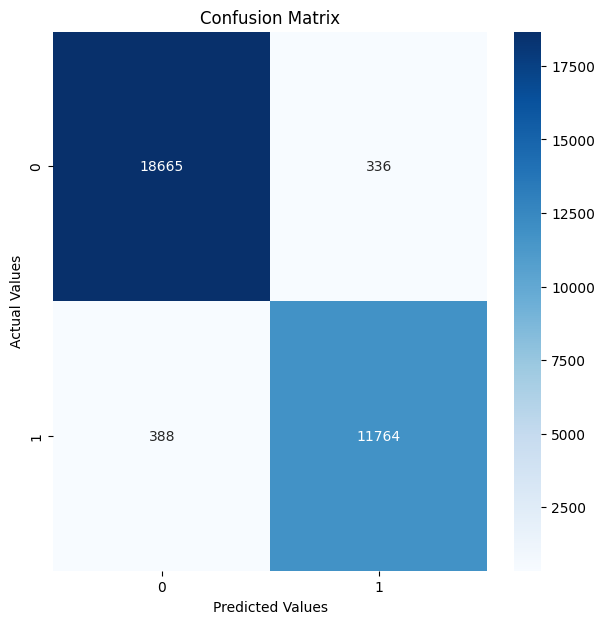

In [22]:
#predicting values using KNN:
KNN(X_train_NR_o,X_test_NR_o,y_train_o,y_test_o)


Prediction using RandomForest Model.
-------------------------------------------------------------------
Acc of Random Forest is:- 98.53946650402851 .
Time taken to run the model is:- 3.7385430335998535 seconds.


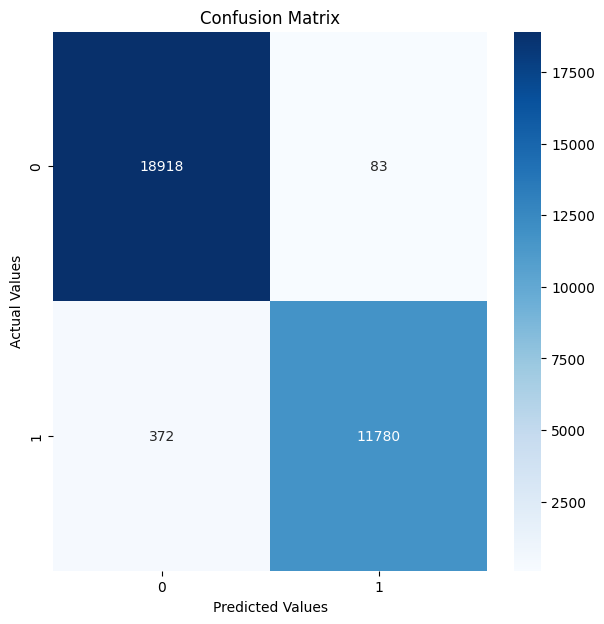

In [23]:
#predicting values using RandomForest:
RandomForest(X_train_NR_o,X_test_NR_o,y_train_o,y_test_o)

Accuracy with kernel as linear is : 78.30%
Accuracy with kernel as poly is : 96.92%
Accuracy with kernel as rbf is : 97.57%

Prediction using SVM Model.
-------------------------------------------------------------------
Acc of SVM model is 97.57326742207813 .
Time taken to run the model is:- 452.139892578125 seconds.
best kernel is :  rbf
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18793
           1       0.98      0.96      0.97     12360

    accuracy                           0.98     31153
   macro avg       0.98      0.97      0.97     31153
weighted avg       0.98      0.98      0.98     31153



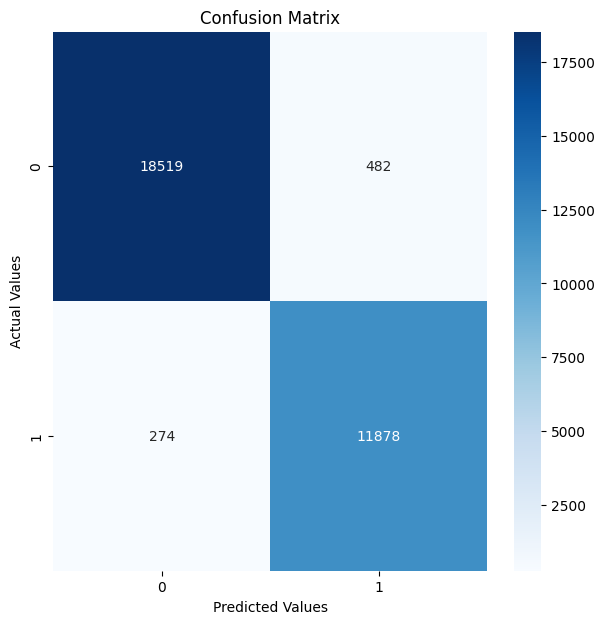

In [24]:
#predicting values using SVM
SupportVectorMachine(X_train_NR_o,X_test_NR_o,y_train_o,y_test_o)


Prediction using Logistic Regression Model.
-------------------------------------------------------------------
Acc of Logistic Regression is:- 76.62504413700125 .
Time taken to run the model is:- 0.21966195106506348 seconds.


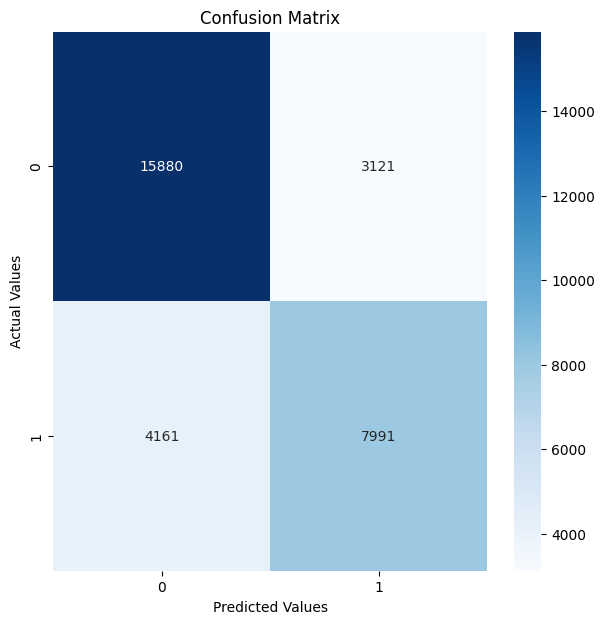

In [25]:
#predicting values using Logistic Regression
LogisticRegress(X_train_NR_o,X_test_NR_o,y_train_o,y_test_o)

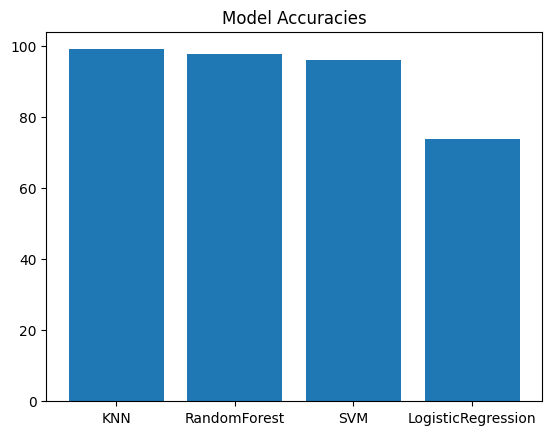

In [32]:
keys = Model_acc_o.keys()
values = Model_acc_o.values()

plt.bar(keys, values)
plt.title("Model Accuracies")
plt.show()

# <center>Creating training and testing for pre-processed database</center>

In [26]:
# df = pd.read_csv("Dataset.csv")
# data1 = df.drop('label',axis='columns')
# x = preprocessing.StandardScaler().fit(data1).transform(data1)
# y = df.label
#separating data as per classes
df_0=df_new[df_new["label"]==0]
df_1=df_new[df_new["label"]==1]
df_label0=df_0.label
df_label1=df_1.label
del df_1['label']
del df_0['label']

# splitting data for training and testing purpose
[X0_train, X0_test, y0_train, y0_test]=train_test_split(df_0,df_label0, test_size=0.3, random_state=42,shuffle=True)
[X1_train, X1_test, y1_train, y1_test]=train_test_split(df_1,df_label1, test_size=0.3, random_state=42,shuffle=True)

# aggregating the training data and test data ofboth classes
X_train = pd.concat((X0_train,X1_train),axis=0)
y_train = pd.concat((y0_train,y1_train),axis=0)
X_test = pd.concat((X0_test,X1_test),axis=0)
y_test = pd.concat((y0_test,y1_test),axis=0)

#normalizing the data:
X_train_NR = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test_NR = preprocessing.StandardScaler().fit(X_test).transform(X_test)

#creating a dictionary to store accuracy values:
Model_acc = {}


Prediction using KNN Model.
-------------------------------------------------------------------
Acc of KNN model with k= 1 is:- 99.0883703014156 .
Time taken to run the model is:- 1.3391218185424805 seconds.

Prediction using KNN Model.
-------------------------------------------------------------------
Acc of KNN model with k= 3 is:- 98.69033479921677 .
Time taken to run the model is:- 1.897312879562378 seconds.

Prediction using KNN Model.
-------------------------------------------------------------------
Acc of KNN model with k= 5 is:- 98.35970853529355 .
Time taken to run the model is:- 1.9338963031768799 seconds.


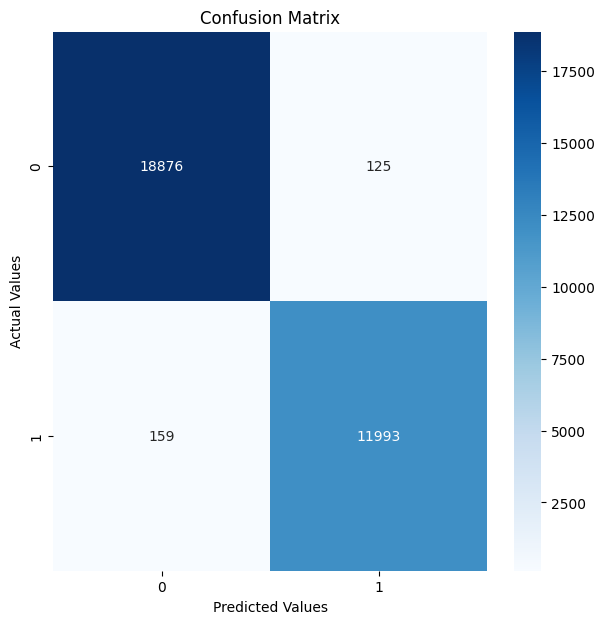

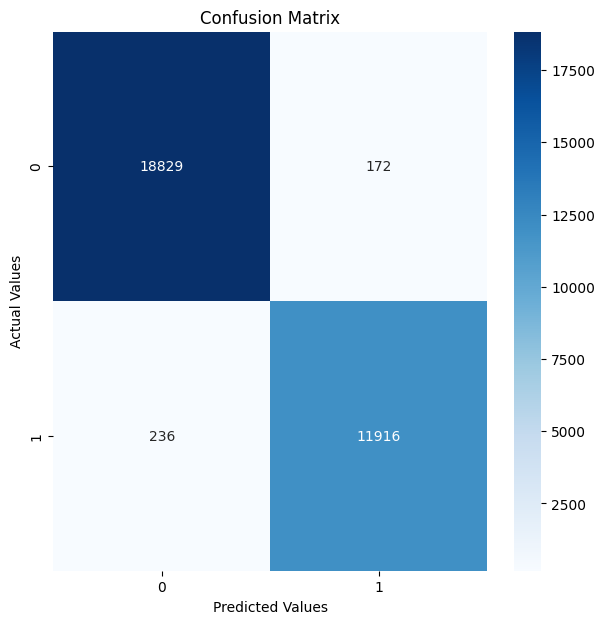

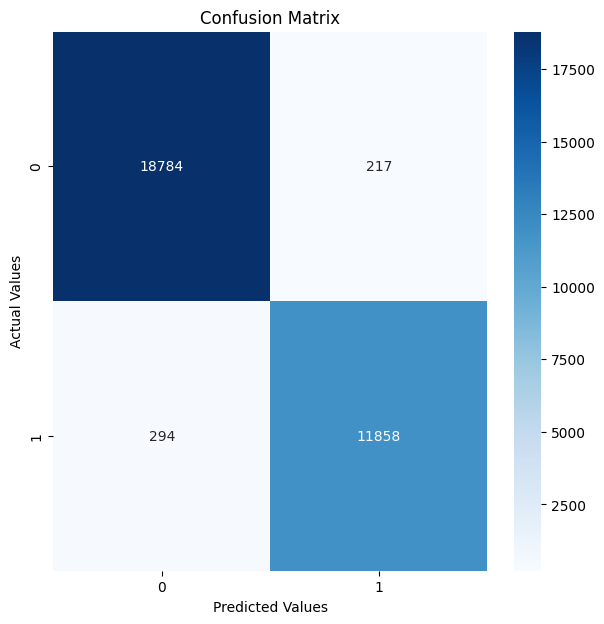

In [27]:
#predicting values using KNN:
KNN(X_train_NR,X_test_NR,y_train,y_test)


Prediction using RandomForest Model.
-------------------------------------------------------------------
Acc of Random Forest is:- 97.78191506435977 .
Time taken to run the model is:- 3.4123146533966064 seconds.


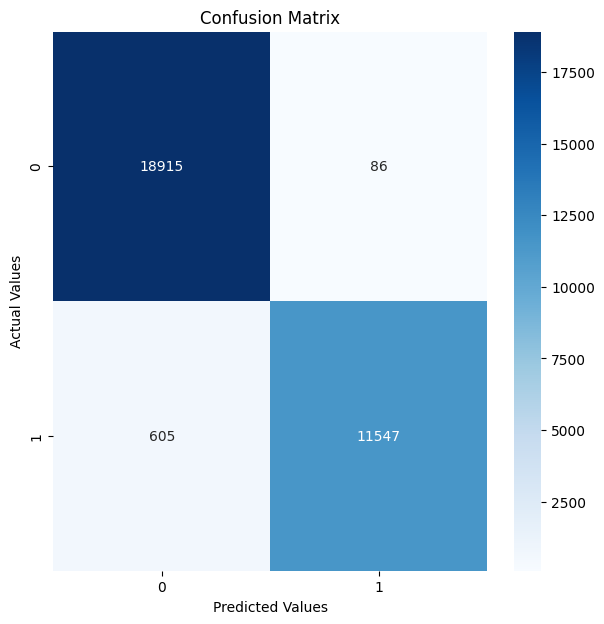

In [28]:
#predicting values using RandomForest:
RandomForest(X_train_NR,X_test_NR,y_train,y_test)

Accuracy with kernel as linear is : 74.62%
Accuracy with kernel as poly is : 94.46%
Accuracy with kernel as rbf is : 96.05%

Prediction using SVM Model.
-------------------------------------------------------------------
Acc of SVM model is 96.05495457901326 .
Time taken to run the model is:- 243.4608085155487 seconds.
best kernel is :  rbf
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18970
           1       0.95      0.95      0.95     12183

    accuracy                           0.96     31153
   macro avg       0.96      0.96      0.96     31153
weighted avg       0.96      0.96      0.96     31153



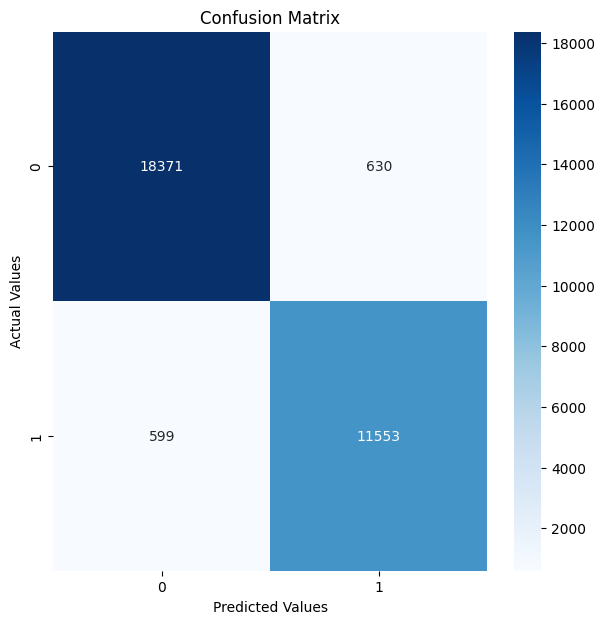

In [29]:
#predicting values using SVM
SupportVectorMachine(X_train_NR,X_test_NR,y_train,y_test)


Prediction using Logistic Regression Model.
-------------------------------------------------------------------
Acc of Logistic Regression is:- 73.92546464224954 .
Time taken to run the model is:- 0.09138226509094238 seconds.


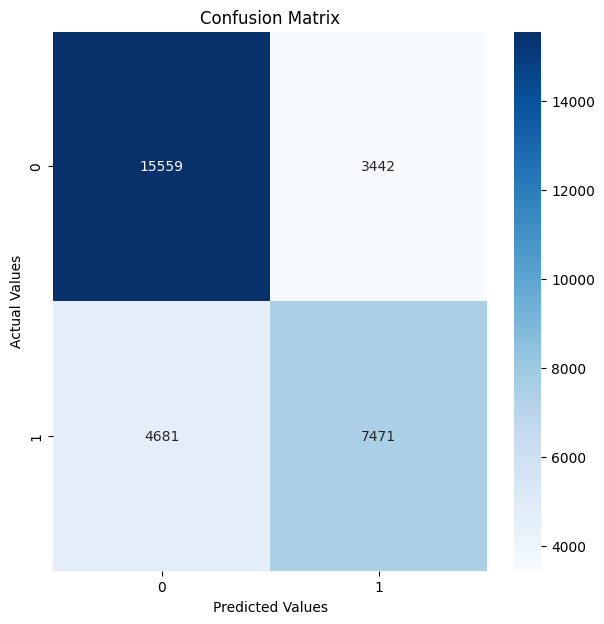

In [30]:
#predicting values using Logistic Regression
LogisticRegress(X_train_NR,X_test_NR,y_train,y_test)

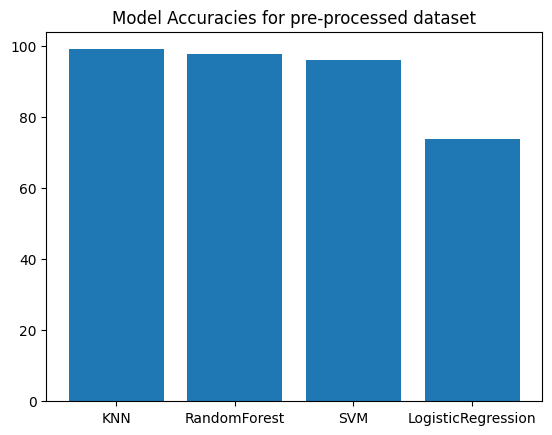

In [31]:
keys = Model_acc.keys()
values = Model_acc.values()

plt.bar(keys, values)
plt.title("Model Accuracies for pre-processed dataset")
plt.show()